In [ ]:

# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

!pip install pyspark

pyspark

     |████████████████████████████████| 281.3 MB 53 kB/s 
     |████████████████████████████████| 198 kB 89.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=e51789319489b9b1fd8d41dc48074e784792e7e347bb1a7c928adcb2e73cd7df
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


<module 'pyspark' from '/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/__init__.py'>

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext 
# sc = SparkContext.getOrCreate() 
spark = SparkSession.builder.appName("DataFrame").getOrCreate()
df_games = spark.read.format("json").load("/content/gdrive/MyDrive/games_2012_copy.json")
df_games.printSchema()     

root
 |-- date: string (nullable = true)
 |-- defense_interception_touchdowns: long (nullable = true)
 |-- defense_interception_yards: long (nullable = true)
 |-- defense_interceptions: long (nullable = true)
 |-- defense_sacks: double (nullable = true)
 |-- defense_safeties: long (nullable = true)
 |-- defense_tackle_assists: long (nullable = true)
 |-- defense_tackles: long (nullable = true)
 |-- field_goal_attempts: long (nullable = true)
 |-- field_goal_makes: long (nullable = true)
 |-- game_location: string (nullable = true)
 |-- game_number: string (nullable = true)
 |-- game_won: boolean (nullable = true)
 |-- kick_return_attempts: long (nullable = true)
 |-- kick_return_touchdowns: long (nullable = true)
 |-- kick_return_yards: long (nullable = true)
 |-- opponent: string (nullable = true)
 |-- opponent_goals: long (nullable = true)
 |-- opponent_goalsage: long (nullable = true)
 |-- opponent_goalsdate: long (nullable = true)
 |-- opponent_score: string (nullable = true)
 |-- 

In [ ]:
#game_location
from pyspark.sql.functions import when
df_games = spark.read.format("json").load("/content/gdrive/MyDrive/games_2012_copy.json")
df_games.createOrReplaceTempView('df_games')

df = spark.sql('select game_location, count(game_location) as games_played,year from df_games where year="2014" group by game_location,year')

df_games_played = df.withColumn("game_location", when(df.game_location == "N","NRG Stadium, Houston")
                                 .when(df.game_location == "H","Hawaii")
                                 .when(df.game_location == "A","Arizona")
                                 .when(df.game_location.isNull() ,"")
                                 .otherwise(df.game_location))
# df_games_played.show()


([<matplotlib.patches.Wedge at 0x7f83488c9490>,
 [Text(-0.7125008685272214, -0.8380587761893288, 'Hawaii'),
  Text(0.7220762908424342, 0.8298227703571605, 'Arizona'),
  Text(-0.8344749996891764, 0.7166948268919968, 'NRG Stadium, Houston')],
 [Text(-0.38863683737848437, -0.45712296883054293, '49.8%'),
  Text(0.39385979500496404, 0.45263060201299654, '49.8%'),
  Text(-0.4551681816486416, 0.3909244510319982, '0.4%')])

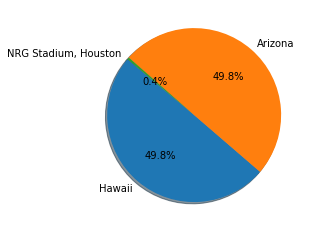

In [ ]:
import matplotlib.pyplot as plt

game_location1 = [val.game_location for val in df_games_played.select('game_location').collect()]
games_played1 = [val.games_played for val in df_games_played.select('games_played').collect()]




from matplotlib import pyplot as plt
import numpy as np
 
plt.pie(games_played1, labels=game_location1,
autopct='%1.1f%%', shadow=True, startangle=140)

In [ ]:
#Winning team

from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark import SparkContext 
# sc = SparkContext.getOrCreate() 
spark = SparkSession.builder.appName("DataFrame").getOrCreate()
df_games = spark.read.format("json").load("/content/gdrive/MyDrive/games_2012_copy.json")

df_games = df_games.select('game_won','team').filter("game_won ='true'").filter("year = 2015")
df_games.createOrReplaceTempView("df_games")

df_won = spark.sql('select count(team) as win_team,team from df_games group by game_won,team limit 10').orderBy(col("win_team").desc())#.show()

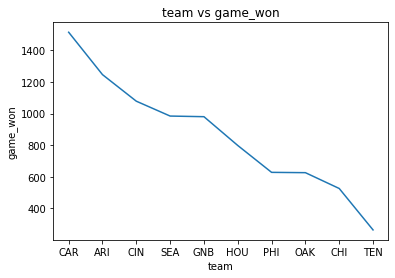

In [ ]:
import matplotlib.pyplot as plt

game_won1 = [val.win_team for val in df_won.select('win_team').collect()]
team1 = [val.team for val in df_won.select('team').collect()]

plt.plot(team1, game_won1)

plt.ylabel('game_won')
plt.xlabel('team')
plt.title('team vs game_won')
#plt.legend(['current_salary'], loc='upper left')

plt.show()

In [ ]:
#more students come from which school
import matplotlib.pyplot as plt
df_profiles = spark.read.format("json").load("/content/gdrive/MyDrive/profiles.json")
df_profiles.createOrReplaceTempView('df_profiles')

df_res = spark.sql('select college,count(*) as number_of_students from df_profiles where college <> "none" group by college order by number_of_students desc limit 5').show()


+----------+------------------+
|   college|number_of_students|
+----------+------------------+
|Notre Dame|               523|
|       USC|               465|
|  Ohio St.|               422|
|  Michigan|               352|
|  Penn St.|               345|
+----------+------------------+

